In [1]:
import numpy as np
import pandas as pd

def get_fitness(dir):
    criterion_header = ["RouteCompletionTest",   
                    "RouteCompletionTest_figure",
                    "OutsideRouteLanesTest", 
                    "OutsideRouteLanesTest_figure",
                    "CollisionTest",         
                    "CollisionTest_figure",
                    "RunningRedLightTest",   
                    "RunningRedLightTest_figure",
                    "RunningStopTest",       
                    "RunningStopTest_figure",
                    "InRouteTest", 
                    "InRouteTest_figure",          
                    "AgentBlockedTest",
                    "AgentBlockedTest_figure",      
                    "Timeout"]

    fitness_header = ["DOL","DVE","DPD","DSM","DFD"]

    criterion = pd.read_csv(dir+'criterion.csv',names=criterion_header)
    fitness = pd.read_csv(dir+'fitness.csv',names=fitness_header)
    result = pd.DataFrame()
    
    result['RouteCompletionTest']   =   criterion["RouteCompletionTest_figure"]/100
    result['OutsideRouteLanesTest'] = 1-criterion["OutsideRouteLanesTest_figure"]/100
    result['CollisionTest']         =   criterion["CollisionTest"]
    result['RunningRedLightTest']   = 1-criterion["RunningRedLightTest"]
    result['RunningStopTest']       = 1-criterion["RunningStopTest"]
    result['InRouteTest']           = 1-criterion["InRouteTest"]
    result['AgentBlockedTest']      = 1-criterion["AgentBlockedTest"]
    result['Timeout']               = 1-criterion["Timeout"]
    
    DVE = fitness['DVE'].copy()/2
    DVE[fitness['DVE'] >= 2] = 1

    collisionTest = result['CollisionTest'].copy()
    collisionTest[result['CollisionTest']==0] = DVE[result['CollisionTest']==0]
    collisionTest[result['CollisionTest']==1] = 0

    result.loc[:,'CollisionTest'] = collisionTest
    
    return result

In [2]:
random_data = '../../data/routes_short_2023-07-13|17:37:13/'
# withoutfog_data = '../../data/routes_short_2023-06-23|17:07:59/'
data_label = ['Random', 'Without Fog'] 

select_criterions = ["RouteCompletionTest", 
                     "CollisionTest", 
                     "OutsideRouteLanesTest", 
                     "Timeout"]

random_fitness = get_fitness(random_data)[select_criterions]
# withoutfog_fitness = get_fitness(withoutfog_data)[select_criterions]
print(random_fitness.shape)
# print(withoutfog_fitness.shape)

(975, 4)


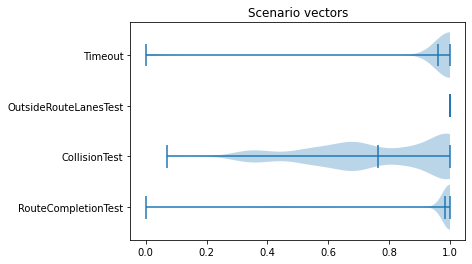

In [5]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(10,10))
vl1 = plt.violinplot(random_fitness, vert=False, showmeans=True, widths=0.9)
# vl2 = plt.violinplot(random_fitness, vert=False, showmeans=True, widths=0.9)
plt.yticks(range(1, 5), select_criterions)
plt.title("Scenario vectors")
# plt.legend(handles=(vl1['cbars'],vl2['cbars']), 
#            labels=[data_label[0],data_label[1]],
#            labelcolor=['blue','orange'],
#            loc=3)

plt.show()

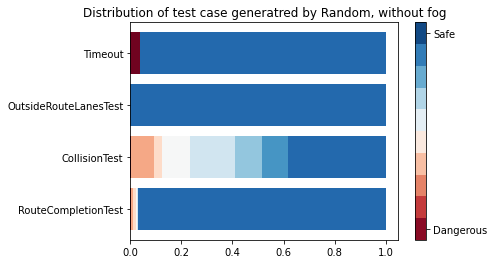

In [6]:
import matplotlib as mpl
cmap = mpl.cm.RdBu
colors = cmap(range(3,253,25))
# cmap.set_array([])


stack_hist_discrete = np.concatenate([
    [np.histogram(random_fitness['RouteCompletionTest'],   range=(0,1), bins=10)[0]/len(random_fitness)],
    [np.histogram(random_fitness['CollisionTest'],         range=(0,1), bins=10)[0]/len(random_fitness)],
    [np.histogram(random_fitness['OutsideRouteLanesTest'], range=(0,1), bins=10)[0]/len(random_fitness)],
    [np.histogram(random_fitness['Timeout'],               range=(0,1), bins=10)[0]/len(random_fitness)],
])

left = np.zeros(4)
for i in range(10):
    plt.barh(y = np.arange(4), width = stack_hist_discrete[:,i], left=left, color = colors[i], height=0.8)
    left += stack_hist_discrete[:,i]

plt.yticks(range(4), select_criterions)
cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmap), ticklocation='right',values=range(10), ticks=[0, 9])
cbar.ax.set_yticklabels(['Dangerous', 'Safe'])  # vertically oriented colorbar

plt.title('Distribution of test case generatred by Random, without fog')
plt.show()

(975, 14)


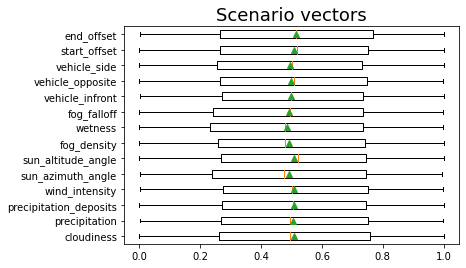

In [7]:
scenario_header = ["cloudiness",
                   "precipitation",
                   "precipitation_deposits",
                   "wind_intensity",
                   "sun_azimuth_angle",
                   "sun_altitude_angle",
                   "fog_density",
                   "wetness",
                   "fog_falloff",
                   "vehicle_infront", 
                   "vehicle_opposite", 
                   "vehicle_side",
                   "start_offset",
                   "end_offset"]

scenarios = pd.read_csv(random_data+'scenario.csv',names=scenario_header)
print(scenarios.shape)
        
# plt.figure(figsize=(20,2))
plt.boxplot(scenarios, labels=scenario_header, vert=False, showmeans=True)
plt.title("Scenario vectors", fontsize=18)
plt.show()

(975, 5)


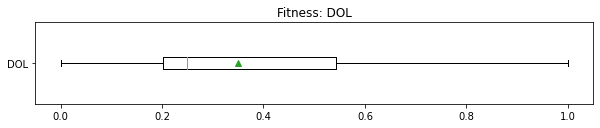

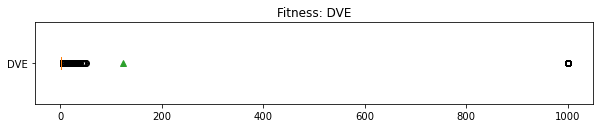

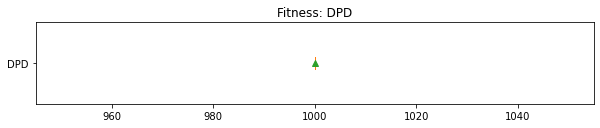

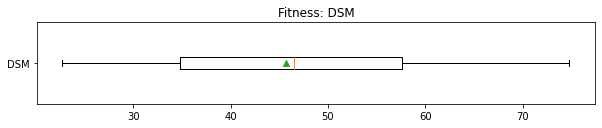

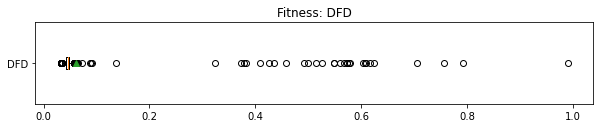

In [9]:
import numpy as np
import pandas as pd
import os

data_folders = ['../../data/routes_short_2023-07-13|17:37:13/']

fitness_header = ["DOL","DVE","DPD","DSM","DFD"]
fitnesses = pd.read_csv(data_folders[0]+'fitness.csv',names=fitness_header)
for i in range(1, len(data_folders)):
    fitnesses = pd.concat([fitnesses, pd.read_csv(data_folders[i]+'fitness.csv',names=fitness_header)])
print(fitnesses.shape)
        
for fitness_label in fitness_header:
    plt.figure(figsize=(10,1.5))
    plt.boxplot(fitnesses[fitness_label], labels=[fitness_label], vert=False, showmeans=True)
    plt.title('Fitness: '+fitness_label)
    plt.show()

In [12]:
criterion_header = ["RouteCompletionTest",   
                    "RouteCompletionTest_figure",
                    "OutsideRouteLanesTest", 
                    "OutsideRouteLanesTest_figure",
                    "CollisionTest",         
                    "CollisionTest_figure",
                    "RunningRedLightTest",   
                    "RunningRedLightTest_figure",
                    "RunningStopTest",       
                    "RunningStopTest_figure",
                    "InRouteTest", 
                    "InRouteTest_figure",          
                    "AgentBlockedTest",
                    "AgentBlockedTest_figure",      
                    "Timeout"]
criterions = pd.read_csv(data_folders[0]+'criterion.csv',names=criterion_header)
for i in range(1, len(data_folders)):
    criterions = pd.concat([criterions, pd.read_csv(data_folders[i]+'criterion.csv',names=criterion_header)])
print(criterions.shape)
criterions = criterions.replace('SUCCESS',0).replace('FAILURE',1)
criterions.head()


(975, 15)


,RouteCompletionTest,RouteCompletionTest_figure,OutsideRouteLanesTest,OutsideRouteLanesTest_figure,CollisionTest,CollisionTest_figure,RunningRedLightTest,RunningRedLightTest_figure,RunningStopTest,RunningStopTest_figure,InRouteTest,InRouteTest_figure,AgentBlockedTest,AgentBlockedTest_figure,Timeout
0,1,38.89,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,100.00,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,100.00,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,100.00,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,100.00,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
criterion_bool_head = ["RouteCompletionTest",   
                        "OutsideRouteLanesTest", 
                        "CollisionTest",         
                        "RunningRedLightTest",   
                        "RunningStopTest",       
                        "InRouteTest", 
                        "AgentBlockedTest",
                        "Timeout"]

print(len(criterions))
(criterions[criterion_bool_head] == 1).sum()

975


RouteCompletionTest      37
OutsideRouteLanesTest     0
CollisionTest             0
RunningRedLightTest       0
RunningStopTest           0
InRouteTest               0
AgentBlockedTest          0
Timeout                  37
dtype: int64

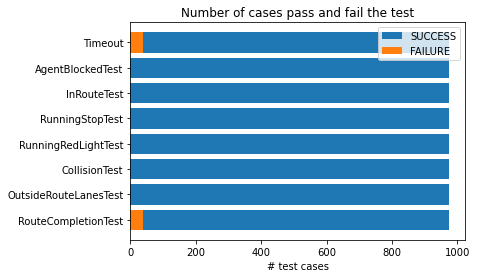

In [16]:
import matplotlib.pyplot as plt

plt.barh(criterion_bool_head, [criterions.shape[0]]*8)
plt.barh(criterion_bool_head, (criterions[criterion_bool_head] == 1).sum())
plt.legend(['SUCCESS','FAILURE'])
plt.title('Number of cases pass and fail the test')
plt.xlabel('# test cases')
plt.show()

(nan, nan)


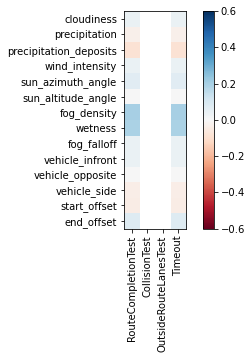

In [19]:
select_criterions = ["RouteCompletionTest", "CollisionTest", "OutsideRouteLanesTest", "Timeout"] 


scenario_criterion = pd.concat([scenarios, criterions[select_criterions]],axis=1)

print("({}, {})".format(round(scenario_criterion.corr().to_numpy()[:14, 14:18].min(), 4), 
                        round(scenario_criterion.corr().to_numpy()[:14, 14:18].max(), 4)))

plt.imshow(scenario_criterion.corr().to_numpy()[:14, 14:18], cmap='RdBu', vmin=-0.6, vmax=0.6)
plt.yticks(range(14),scenario_criterion.columns.tolist()[:14])
plt.xticks(range(4),scenario_criterion.columns.tolist()[14:18],rotation=90)
plt.colorbar()
plt.show()
# Positive means easy to cause failure